In [1]:
%run ../chap08/cnn_reg_model.ipynb
%run ../chap05/dataset_flowers.ipynb
%run ../chap06/dataset_office31.ipynb

In [2]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

Model flowers_model_1 train started:
    Epoch 2: cost=1.563, accuracy=0.289/0.290 (14/14 secs)
    Epoch 4: cost=1.599, accuracy=0.246/0.210 (15/29 secs)
    Epoch 6: cost=1.587, accuracy=0.259/0.300 (18/47 secs)
    Epoch 8: cost=1.598, accuracy=0.246/0.260 (17/64 secs)
    Epoch 10: cost=1.598, accuracy=0.246/0.210 (17/81 secs)
Model flowers_model_1 train ended in 81 secs:
Model flowers_model_1 test report: accuracy = 0.233, (0 secs)

Model flowers_model_1 Visualization


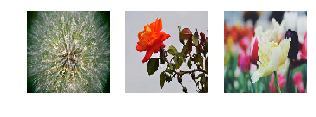

추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 dandelion => O
추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 rose => X
추정확률분포 [18,25,18,17,23] => 추정 dandelion : 정답 tulip => X


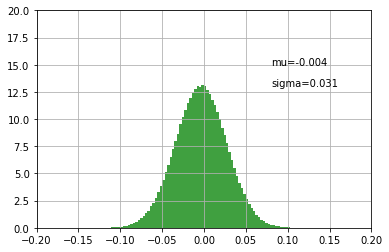

Near 0 parameters =  0.0%(209/829790)


In [3]:
fm1 = CnnRegModel('flowers_model_1', fd, [30,10])
fm1.exec_all(epoch_count=10, report=2, show_params=True)

Model flowers_model_2 train ended in 567 secs:
Model flowers_model_2 test report: accuracy = 0.233, (0 secs)



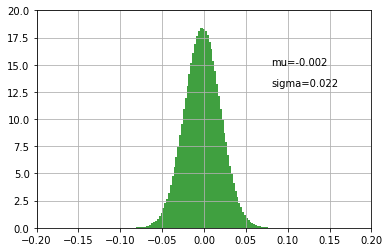

Near 0 parameters =  0.0%(342/829790)


In [4]:
fm2 = CnnRegModel('flowers_model_2', fd, [30,10], l2_decay=0.1)
fm2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_model_3 train ended in 585 secs:
Model flowers_model_3 test report: accuracy = 0.233, (0 secs)



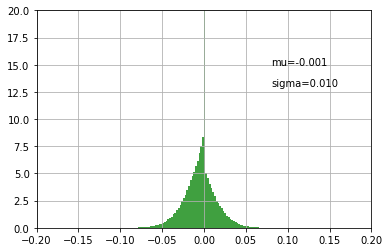

Near 0 parameters = 73.7%(611917/829790)


In [5]:
fm3 = CnnRegModel('flowers_model_3', fd, [30,10], l1_decay=0.01)
fm3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

Model flowers_cnn_1 train started:
    Epoch 2: cost=1.098, accuracy=0.557/0.630 (153/153 secs)
    Epoch 4: cost=0.918, accuracy=0.653/0.540 (155/308 secs)
    Epoch 6: cost=0.785, accuracy=0.703/0.620 (157/465 secs)
    Epoch 8: cost=0.693, accuracy=0.741/0.680 (158/623 secs)
    Epoch 10: cost=0.581, accuracy=0.783/0.670 (154/777 secs)
Model flowers_cnn_1 train ended in 777 secs:
Model flowers_cnn_1 test report: accuracy = 0.633, (5 secs)

Model flowers_cnn_1 Visualization


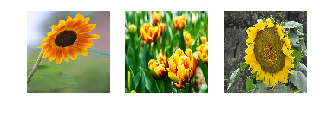

추정확률분포 [ 1, 1, 4,91, 3] => 추정 sunflower : 정답 sunflower => O
추정확률분포 [ 1, 0, 1,98, 0] => 추정 sunflower : 정답 tulip => X
추정확률분포 [ 0, 1, 0,99, 0] => 추정 sunflower : 정답 sunflower => O


In [6]:
cnn1 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn1 = CnnRegModel('flowers_cnn_1', fd, cnn1)
fcnn1.exec_all(epoch_count=10, report=2)

In [7]:
cnn2 = [['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['dropout', {'keep_prob':0.6}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}],
        ['dropout', {'keep_prob':0.6}]]
fcnn2 = CnnRegModel('flowers_cnn_2', fd, cnn2)
fcnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_2 train started:
    Epoch 2: cost=1.207, accuracy=0.490/0.500 (162/162 secs)
    Epoch 4: cost=1.064, accuracy=0.572/0.570 (163/325 secs)
    Epoch 6: cost=0.986, accuracy=0.621/0.520 (161/486 secs)
    Epoch 8: cost=0.918, accuracy=0.641/0.570 (172/658 secs)
    Epoch 10: cost=0.898, accuracy=0.658/0.550 (165/823 secs)
Model flowers_cnn_2 train ended in 823 secs:
Model flowers_cnn_2 test report: accuracy = 0.557, (5 secs)



In [8]:
noise_std = 0.01
cnn3 = [['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['noise', {'type':'normal','mean':0,'std':noise_std}],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn3 = CnnRegModel('flowers_cnn_3', fd, cnn3)
fcnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_3 train started:
    Epoch 2: cost=1.099, accuracy=0.580/0.610 (180/180 secs)
    Epoch 4: cost=0.932, accuracy=0.646/0.620 (177/357 secs)
    Epoch 6: cost=0.805, accuracy=0.697/0.660 (176/533 secs)
    Epoch 8: cost=0.707, accuracy=0.740/0.680 (176/709 secs)
    Epoch 10: cost=0.590, accuracy=0.780/0.630 (181/890 secs)
Model flowers_cnn_3 train ended in 890 secs:
Model flowers_cnn_3 test report: accuracy = 0.613, (4 secs)



In [9]:
cnn4 = [['batch_normal'],
        ['conv',{'ksize':3, 'chn':6}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':12}],
        ['max',{'stride':2}],
        ['batch_normal'],
        ['conv',{'ksize':3, 'chn':24}],
        ['avg',{'stride':3}]]
fcnn4 = CnnRegModel('flowers_cnn_4', fd, cnn4)
fcnn4.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_4 train started:
    Epoch 2: cost=1.054, accuracy=0.584/0.410 (168/168 secs)
    Epoch 4: cost=0.878, accuracy=0.661/0.400 (128/296 secs)
    Epoch 6: cost=0.785, accuracy=0.699/0.480 (132/428 secs)
    Epoch 8: cost=0.689, accuracy=0.733/0.540 (134/562 secs)
    Epoch 10: cost=0.608, accuracy=0.774/0.540 (126/688 secs)
Model flowers_cnn_4 train ended in 688 secs:
Model flowers_cnn_4 test report: accuracy = 0.530, (4 secs)



In [10]:
ocnn1 = CnnRegModel('office31_cnn_1', od, cnn1)
ocnn2 = CnnRegModel('office31_cnn_2', od, cnn2)
ocnn3 = CnnRegModel('office31_cnn_3', od, cnn3)
ocnn4 = CnnRegModel('office31_cnn_4', od, cnn4)

ocnn1.exec_all(epoch_count=10, show_cnt=0)
ocnn2.exec_all(epoch_count=10, show_cnt=0)
ocnn3.exec_all(epoch_count=10, show_cnt=0)
ocnn4.exec_all(epoch_count=10, show_cnt=0)

Model office31_cnn_1 train ended in 525 secs:
Model office31_cnn_1 test report: accuracy = 0.874+0.558, (3 secs)

Model office31_cnn_2 train ended in 550 secs:
Model office31_cnn_2 test report: accuracy = 0.797+0.530, (3 secs)

Model office31_cnn_3 train ended in 607 secs:
Model office31_cnn_3 test report: accuracy = 0.906+0.541, (4 secs)

Model office31_cnn_4 train ended in 595 secs:
Model office31_cnn_4 test report: accuracy = 0.894+0.390, (4 secs)

